## Chapter 14: Using Random Numbers and Probability Models

The last chapter discussed probability, distributions and random numbers as well as pseudorandom numbers.  In this chapter we will use these ideas to build probability models and answer related questions

In [13]:
using StatsBase, StatsPlots

#### 14.1: Flipping Coins

We can flip 100 coins in a pseudorandom way in julia with

In [5]:
coins = rand(Bool,100)

100-element Array{Bool,1}:
 1
 0
 0
 1
 0
 0
 1
 1
 1
 0
 0
 0
 1
 ⋮
 0
 0
 1
 0
 0
 1
 1
 1
 1
 0
 0
 1

This is an array of booleans, but you can interpret this as a 0 for a tails and a 1 for a heads.  We can find the mean of this.  

In [7]:
mean(coins)

0.54

Flipping a single coin over and over again is not so interesting, but here's how we can flip 3 coins.  Each row denotes a 3-flip event. This is done 100 times. 

In [9]:
coins3 = rand(Bool,100,3)

100×3 Array{Bool,2}:
 1  0  1
 1  1  1
 1  0  1
 1  1  1
 0  1  1
 1  0  1
 1  0  1
 1  1  0
 1  0  0
 1  0  1
 1  1  0
 0  0  1
 1  1  0
 ⋮     
 0  0  0
 0  1  0
 0  1  0
 1  0  1
 0  0  1
 0  1  1
 1  0  1
 0  0  1
 0  0  1
 1  0  0
 0  1  0
 1  0  0

And the following will determine the number of heads flipped by summing along each row: 

In [16]:
heads_sum = mapslices(sum,coins3;dims=[2])

100×1 Array{Int64,2}:
 2
 3
 2
 3
 2
 2
 2
 2
 1
 2
 2
 1
 2
 ⋮
 0
 1
 1
 2
 1
 2
 2
 1
 1
 1
 1
 1

The following counts the number of heads for 0, 1, 2, 3

In [17]:
num_heads = counts(heads_sum,0:3)

4-element Array{Int64,1}:
  8
 32
 47
 13

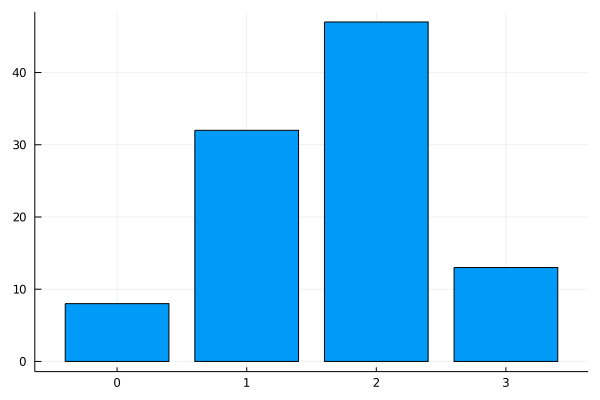

In [18]:
bar(0:3,num_heads, legend=false)

Here's a plot of the simulated dice rolls along with the know probability distribution function.  Note: we have turned the number of heads rolled to a fraction so the comparison is equivalent

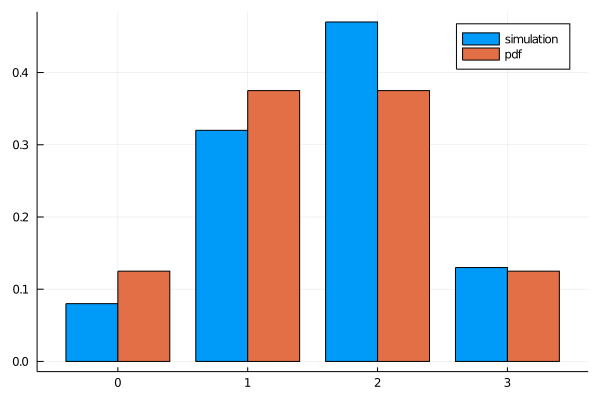

In [22]:
groupedbar(0:3,hcat(num_heads/sum(num_heads),[1/8,3/8,3/8,1/8]),label=["simulation" "pdf"])

#### 14.2: Rolling a die

Last chapter, we saw how to represent the rolling of a single die a larger number of times. Recall that we can roll a single die 100 times with

In [20]:
die100 = rand(1:6,100)

100-element Array{Int64,1}:
 5
 3
 4
 1
 4
 1
 3
 1
 4
 6
 5
 4
 1
 ⋮
 5
 1
 2
 1
 4
 5
 1
 2
 6
 3
 4
 2

And if we want to count the number of times each number is rolled:

In [21]:
die_count = counts(die100,1:6)

6-element Array{Int64,1}:
 23
 13
 21
 13
 20
 10

And we can plot this versus the probability distribution function with:

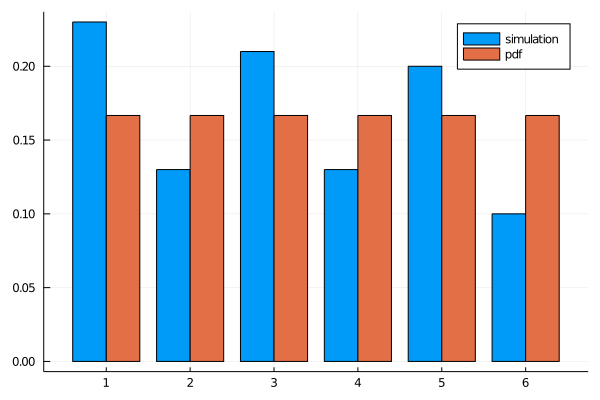

In [24]:
groupedbar(1:6,hcat(die_count/sum(die_count),[1/6 for i=1:6]),label=["simulation" "pdf"])

### 14.3: Rolling 2 dice

Let's roll 2 dice now and see what happens.  The following will roll 2 dice 10,000 times:

In [25]:
dice2=rand(1:6,10_000,2)

10000×2 Array{Int64,2}:
 1  5
 3  4
 6  3
 6  5
 6  5
 3  4
 2  6
 1  5
 3  4
 2  1
 2  4
 4  4
 6  5
 ⋮  
 1  5
 6  6
 5  1
 5  5
 6  4
 5  4
 5  3
 5  1
 3  1
 6  3
 5  3
 3  6

Sum along the rows:

In [33]:
# sum_dice2 = 

In [35]:
dice_count = counts(sum_dice2,2:12)

11-element Array{Int64,1}:
  273
  562
  832
 1096
 1346
 1699
 1394
 1112
  800
  611
  275

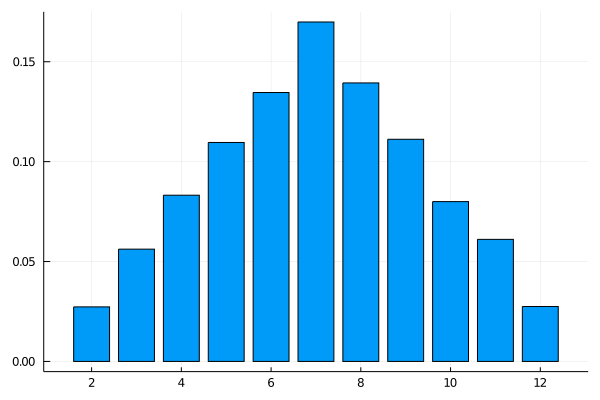

In [36]:
bar(2:12,dice_count/sum(dice_count), xticks=2:2:12, legend=false)

And here's a plot of the simulation versus the pdf:

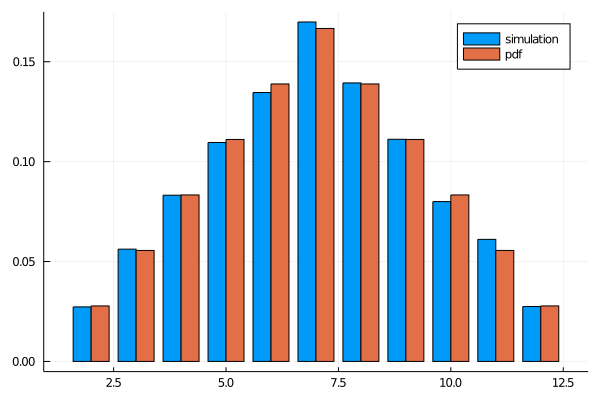

In [37]:
groupedbar(2:12,hcat(dice_count/sum(dice_count),[(6-abs(i-7))/36 for i=2:12]),
    label=["simulation" "pdf"])

We can also ask some interesting questions about probability of dice. 

Here's the probability of getting a 7

In [39]:
count(x->x==7,sum_dice2)/sum(sum_dice2)

0.024205727311582846

Here's the probability of getting a 10 or more:

In [40]:
count(x->x>=10,sum_dice2)/sum(sum_dice2)

0.02402051574298333

#### Exercise

1. Estimate the probability of getting 6 or less
2. Estimate the probability of getting an even number.

### 14.4: Other Probability Models

Consider the following problem:

A round table has 7 chairs around it. Mary and her friend Alisha and 5 other people are given seats at the table in a random manner. What is the probability that Mary and Alisha sit next to each other?

This problem can be found by finding the total number of arrangements that they sit next to each other and divide by the total number of arrangement.  Instead, we will use simulation to do this:

### Model of sitting at table

In [41]:
names = ["Alisha", "Mary", "p1", "p2", "p3", "p4", "p5"]

7-element Array{String,1}:
 "Alisha"
 "Mary"
 "p1"
 "p2"
 "p3"
 "p4"
 "p5"

This function returns a boolean depending on whether or not the friends sit next to each other. 

In [43]:
function nextToEachOther(names::Array{String,1})
  a = findfirst(name -> name=="Alisha",names)  # this is the position where Alisha sits
  m = findfirst(name -> name=="Mary",names)    # this is the position where Mary sits
  abs(a-m) == 1 || abs(a-m) == length(names)-1  # return true if either the numbers are 1 away or 6 away
end

nextToEachOther (generic function with 1 method)

Let's check some examples:

In [52]:
nextToEachOther(names)

true

In [49]:
nextToEachOther(["Alisha", "Mary", "person1", "person2", "person3", "person4", "person5"])

true

In [50]:
nextToEachOther(["Alisha", "person1", "Mary", "person2", "person3", "person4", "person5"])

false

In [51]:
nextToEachOther(["Alisha","person1", "person2", "person3", "person4", "person5", "Mary"])

true

What we are now going to do is to randomly shuffle the the names and see if the arrangement has the friends sitting next to each other.

In [53]:
using Random

This shuffles an array:

In [55]:
shuffle(names)

7-element Array{String,1}:
 "p3"
 "p5"
 "Mary"
 "p4"
 "p1"
 "p2"
 "Alisha"

Here's a block of code that tests the arrangents 10,000 times

In [56]:
let 
  num_sits = 0
  for i=1:10_000
    if nextToEachOther(shuffle(names))
      num_sits += 1
    end
  end
  num_sits/10_000
end

0.3337

We can do the analysis to determine that analytically the answer is 1/3, so this is quite close

### 14.5: Calculating π using pseudo random numbers

#### Buffon's needle experiment

#### Circle in the Square

1. generate points in the square $[0,1]\times[0,1]$.
2. determine the number of points within the unit circle
3. The fraction of points with the unit circle approximates $\pi/4$

In [57]:
pts=rand(100,2);

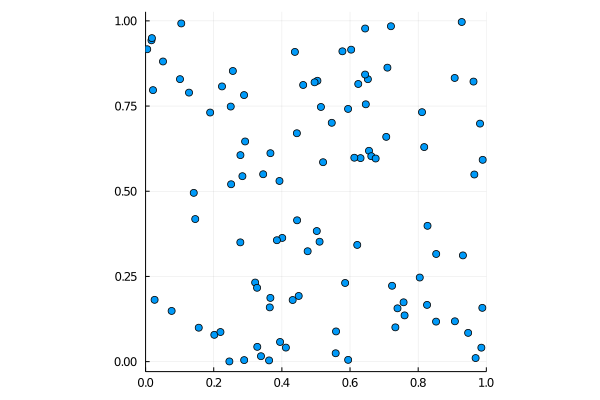

In [61]:
scatter(pts[:,1],pts[:,2], legend=false, aspect_ratio = :equal, xlim=(0,1))

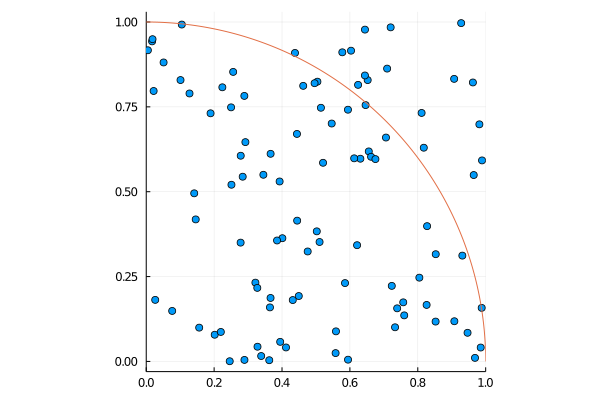

In [62]:
plot!(cos,sin,0,pi/2)

If we increase the number of points that we choose randomly, the answer should tend to $\pi/4$.

First, let's find the distance each point is from the origin:

In [64]:
dist=mapslices(pt->sqrt(pt[1]^2+pt[2]^2),pts;dims=[2])

100×1 Array{Float64,2}:
 0.8887002836601113
 0.4889396091266678
 0.39885978263347327
 0.8822805136638227
 1.0263493996431912
 1.0927293148501083
 0.540948175655989
 0.9014698334927044
 0.7399085681740982
 0.18325503152771627
 1.0089555898800153
 0.8416161751472624
 0.9820696290679539
 ⋮
 0.949543694292232
 1.1530130565871897
 0.6668792134787317
 0.8426184075657596
 0.2893784222024257
 0.62013133368525
 1.2655113214879614
 0.8381647564421739
 0.18507940953383822
 0.7970239568362679
 0.24593622607713694
 0.8605521127882182

In [69]:
inside_circle = count(d -> d<1, dist)

82

So this shows that 82% of the points are within the circle and we can approximate $\pi$ by multiplying the percent by 4. 

In [70]:
inside_circle*4/100

3.28

#### create a function to do this

In [76]:
function calcPi(total_points::Integer) 
    pts=rand(total_points,2) 
    dist=mapslices(pt->pt[1]^2+pt[2]^2,pts;dims=[2]) 
    4*count(d->d<1,dist)/total_points
end

calcPi (generic function with 1 method)

In [75]:
calcPi(10_000)

0.0304

In [83]:
calcPi(10^6)

3.140528

In [84]:
@time calcPi(10^7)

  5.858203 seconds (110.00 M allocations: 2.608 GiB, 10.66% gc time)


3.1418488